Neerja Aggarwal

9/23/21

Purpose: Given a ground truth object (1-d array with scattering values along z), output what the interference spectra will look like.

There are two ways to go about this:

1) Just take the fourier transform and apply system calibration parameters (basically undoing the data analysis/processing step)

2) Use analytical formulas to take into account the input source bandwidth


# Method 1: Inverse FFT

In [11]:
#import the ground truth or simulate. 
#in our case, we'll just import. 
import scipy.io
from matplotlib import pyplot as plt
import numpy as np

bscanspatialmat = scipy.io.loadmat('data from joe/OCT_Bscan(1).mat')
bscanspatial = bscanspatialmat['OCT_Bscan']
calvectors = scipy.io.loadmat('data from joe/chirp_apodization.mat')
apodspec = calvectors['ApodizationSpectrum']
chirp = calvectors['Chirp']

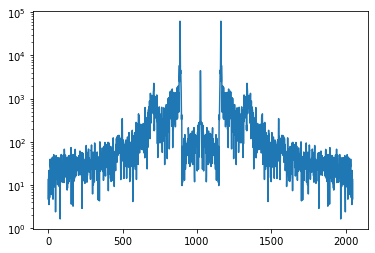

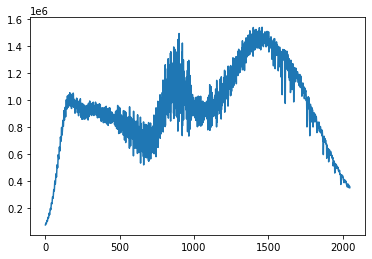

In [79]:
# convert from dB to linear if needed
from scipy import interpolate
bscanspatialLin = 10 ** (bscanspatial/20)

(k1,k2) = bscanspatial.shape

singlespat = bscanspatialLin[:,1]
#copy and repeat. 
b = np.flip(singlespat)
c = np.concatenate((b, singlespat))
plt.figure()
plt.semilogy(c)

spectrum = np.real(np.fft.fftshift(np.fft.ifft(c*len(c)))) #fft
hann = np.hanning(k1*2)# hanning window
#spectrum = spectrum/hann

f = interpolate.interp1d(np.arange(len(spectrum)), spectrum) #linearize using chirp
y = f(chirp) + apodspec
plt.figure()
plt.plot(y)

# Method 2: Physics based approach